# CH 03 평가

머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가(Evaluation)의 프로세스로 구성된다. 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있다. 성능 평가 지표(Evaluation Metric)는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉜다. 회귀의 경우 대부분 실제 값과 예측값의 오차 평균값에 기반한다. 예를 들어 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 평균 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다.

분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있다. 본 장에서는 분류에 사용되는 성능 평가 지표에 대해서 집중적으로 설명하겠다. 특히 0과 1로 결정값이 한정되는 이진 분류의 성능 평가 지표에 대해서 집중적으로 설명하겠다. 0이냐, 1이냐 혹은 긍정/부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많다.

**분류의 성능 평가 지표**

* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어
* ROC AUC

분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 **이진 분류**와 여러 개의 결정 클래스 값을 가지는 **멀티 분류**로 나뉠 수 있다. 위에서 언급한 분류의 성능 지표는 이진/멀티 분류 모두에 적용되는 지표이지만, 특히 이진 분류에서 더욱 중요하게 강조하는 지표이다. 다음 절에서 왜 이 지표가 모두 이진 분류에서 중요한지 설명한다.

# 01 정확도(Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이다.

$ 정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수} $

정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다. 정확도 지표가 어떻게 ML 모델의 성능을 왜곡하는지 예제로 살펴보자.

앞의 타이타닉 예제 수행 결과를 보면 ML 알고리즘을 적용한 후 예측 정확도의 결과가 보통 80%대였지만, 탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았기 때문에 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있다. 단지 성별 조건 하나만을 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황이 발생하는 것이다.

다음 예제에서는 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성한다. 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자 생성할 수 있다. 생성할 MyDummyClassifier 클래스는 학습을 수행하는 fit() 메서드는 아무것도 수행하지 않으며 예측을 수행하는 predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 매우 단순한 Classfier이다.

In [5]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range (X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

이제 생성된 MyDummyClassifier를 이용해 앞 장의 타이타닉 생존자 예측을 수행해 보자. 타이타닉 데이터인 titanic_train.csv 파일을 새로운 주피터 노트북을 생성한 디렉터리로 복사해 이동한 뒤, 데이터를 가공하고 나서 이 Classifier를 이용해 학습/예측/평가를 적용해 보자.

In [6]:
#transform_features(df)
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수 생성
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df
# 앞의 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


/tmp/ipython-input-1360971953.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1360971953.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 한다. 특히 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다. 예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다.

유명한 MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용 시 어떤 문제가 발생할 수 있는지 살펴보자. MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit을 예측하는 데 사용한다. 사이킷런은 load_digits() API를 통해 MNIST 데이터 세트를 제공한다. 원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것이다. 이것을 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 살짝 바꿔 보겠다. 즉, 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형하는 것이다.

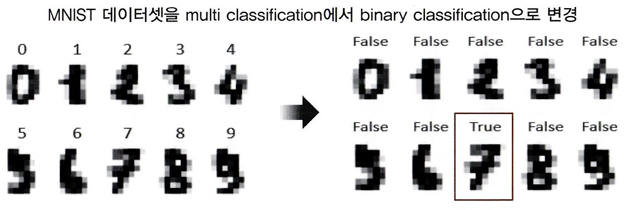

이렇게 불균형한 데이터 세트에 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타낸다. 아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점이다. 예제 코드로 확인해 보자. 먼저 불균형한 데이터 세트와 Dummy Classifier를 생성한다.

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool)

#  사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

다음으로 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 MyFakeClassifier를 이용해 예측과 평가를 수행해 보자.

In [9]:
#  불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


단순히 predict()의 결과를 np.zeros()로 모두 0 값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%이다. 단지 모든 것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90%로 유수의 ML 알고리즘과 어깨를 겨룰 수 있다는 것은 말도 안 되는 결과이다.

이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 된다. 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용하여 ML 모델 성능을 평가해야 한다. 이를 위해, 먼저 True/False, Positive/Negative의 4분면으로 구성되는 오차 행렬(Confusion Matrix)에 대해 설명하겠다.

# 02 오차 행렬

이진 분류에서 성능 지표로 잘 활용되는 오차행렬(confusion matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다. 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.

오차 행렬은 다음과 같은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative와 Positive로 분류하고, 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면을 채울 수 있다. TN, FP, FN, TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있는 것이다.

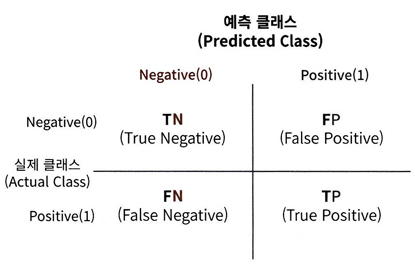

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값(값 1)과 Negative 결정 값(값 0)의 결합에 따라 결정된다. 예를 들어 TN은 True Negative의 의미이며 앞 True는 예측 클래스 값과 실제 클래스 값이 같다는 의미고 뒤의 Negative는 예측값이 Negative 값이라는 의미이다. 즉, TN은 예측을 Negative 값 0으로 예측했는데, 실제 값도 Negative 값 0이라는 의미이다. TN, FP, FN, TP 기호가 의미하는 것은 앞 문자 True/False는 예측값과 실제값이 '같은가/틀린가'를 의미한다. 뒤 문자 Negative/Positive는 예측 결과 값이 부정(0)/긍정(1)을 의미한다.

* TN는 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
* FN은 예측값을 Negativ 값 0으로 예측했는데 실제 값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1


다음 그림은 TN, FP, FN, TP 구분을 재미있게 표현해서 발췌했다.

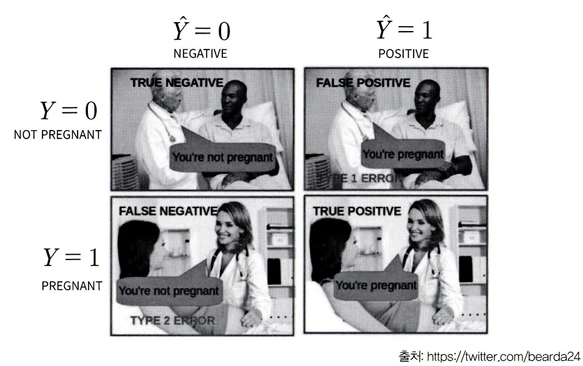

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공한다. 정확도 예제에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현해 보겠다. 앞 절에서 사용한 주피터 노트북에서 코드를 입력하겠다. MyFakeClassifier의 예측 결과인 fakepred와 실제 결과인 y_test를 confusion_matrix()의 인자로 입력해 오차 행렬을 confusion_matrix()를 이용해 배열 형태로 출력한다.

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

출력된 오차 행렬은 ndarray 형태이다. 이진 분류의 TN, FP, FN, FP는 상단 도표와 동일한 위치를 가지고 array에서 가져올 수 있다. 즉, TN은 array[0,0]로 405, FP는 array[0,1]로 0, FN은 array[1,0]로 45, TP는 array[1,1]로 0에 해당한다. 앞 절의 MyFakeClassifier는 load_digits()에서 target==7인지 아닌지에 따라 클래스 값을 True/False 이진 분류로 변경한 데이터 세트를 사용해 무조건 Negative로 예측하는 Classifier였고 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건이다.

따라서 TN은 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건, FP는 Positive 1로 예측한 건수가 없으므로 0건, FN은 Positive 1인 건수 45건을 Negative로 예측해서 False가 된 결과 45건, TP는 Positive 1로 예측한 건수가 없으므로 0건이다.

TP, TN, FP, TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공한다. 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있다.

앞에서도 소개한 정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정된다. 즉, 오차 행렬에서 True에 해당하는 값인 TN과 TP에 좌우된다. 정확도는 오차 행렬상에서 다음과 같이 재정의될 수 있다.

**정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)**

일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0 값을 부여하는 경우가 많다. 예를 들어 사기 행위 예측 모델에서는 사기 행위가 Positive 양성으로 1, 정상 행위가 Negative 음성으로 0 값이 결정 값으로 할당되거나 암 검진 예측 모델에서는 암이 양성일 경우 Positive 양성으로 1, 암이 음성일 경우 Negative 음성으로 0값이 할당되는 경우가 일반적이다.

불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다. 10,000건의 데이터 세트에서 9,900건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 된다. 또한 Negative로 예측할 때 정확도가 높기 때문에 FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positve로 예측하는 경우가 작기 때문에 FP 역시 매우 작아진다. 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 된다.

정확도는 분류(Classification) 모델의 성능을 측정할 수 있는 한 가지 요소일 뿐이다. 불균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있는 사례를 봤다. 다음으로 불균형한 데이터 세트에서 정확도보다 더 선호되는 평가 지표인 정밀도(Precision)와 재현율(Recall)에 대해 알아보자.

# 03 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다. 앞서 만든 MyFakeClassifier는 Positive로 예측한 TP 값이 하나도 없기 때문에 정밀도와 재현율 값이 모두 0이다.

정밀도와 재현율은 다음과 같은 공식으로 계산된다.

**정밀도 = TP / (FP + TP)**

**재현율 = TP / (FN +TP)**

정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. 공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며, 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 **양성 예측도**라고도 불린다.

재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. 공식의 분모인 FN + TP는 실제 값이 Positive인 모든 데이터 건수이며 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. **민감도(Sensitivity) 또는 TPR(True Positive Rate)**라고도 불린다.

정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있다. **재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를  Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우다.** 예를 들어 암 판단 모델은 재현율이 훨씬 중요한 지표이다. 왜냐하면 실제 Positive인 암 환자를 Positive 양성이 아닌 Negative 음성으로 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각하기 때문이다. 반면에 실제 Negative인 건강한 환자를 암 환자인 Positive로 예측한 경우면 다시 한번 재검사를 하는 수준의 비용이 소모될 것이다.

보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요하다. 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것이다. 반면에 정상 금융거래인 Negative를 금융사기인 Positive로 잘못 판단하더라도 다시 한번 금융 사기인지 재확인하는 절차를 가동하면 된다. 물론 고객에게 금융 사기 혐의를 잘못 씌우면 문제가 될 수 있기에 정밀도도 중요 평가 지표지만, 업무적인 특성을 고려하면 재현율이 상대적으로 더 중요한 지표이다.

보통은 재현율이 정밀도보다 상대적으로 중요한 업무가 많지만, 정밀도가 더 중요한 지표인 경우도 있다. 예를 들어 스팸메일 여부를 판단하는 모델의 경우 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생긴다.

* 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우

* 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

다시 한번 재현율과 정밀도의 공식을 살펴보면, 재현율 = TP / (FN + TP), 정밀도 = TP / (FP + TP)이다. 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춘다. 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다. 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다. 반면에 둘 중 어느 한 편가 지표만 매우 높고, 다른 수치는 매우 낮은 결과를 나타내는 경우는 바람직하지 않다.

앞의 타이타닉 예제에서는 정확도에만 초점을 맞췄지만, 이번에 오차 행렬 및 정밀도, 재현율을 모두 구해서 예측 성능을 평가해 보자. 사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공한다. 평가를 간편하게 적용하기 위해서 confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 get_clf_eval() 함수를 만들도록 하자. 그리고 이후에 타이타닉 데이터를 다시 로드한 후 가공해 로지스틱 회귀로 분류를 수행하자.

앞 절에서 사용한 주피터 노트북에 계속 이어 코드를 작성하겠다. 먼저 get_clf_eval() 함수는 다음과 같다.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

이제 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가를 수행한다. LogisticRegression 객체의 생성 인자로 입력되는 solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것이다. 보통 작은 데이터 세트의 이진 분류인 경우 solver는 liblinear가 약간 성능이 좋은 경향이 있다. solver의 기본값은 lbfgs이며 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합하다.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis= 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


/tmp/ipython-input-1360971953.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1360971953.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율 트레이드오프(Trade-off)라고 부른다.

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게 된다. 가령 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종 예측은 더 큰 확률을 가진, 즉 90% 확률을 가진 1로 예측한다. 일반적으로 이진 분류에서는 이 임곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다.

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다. predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다. predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과이다.



---

입력 파라미터: predict() 메서드와 동일하게 보통 테스트 피처 데이터 세트를 입력

반환 값: 개별 클래스의 예측 확률을 ndarray m x n(m: 입력값의 레코드 수, n: 클래스 값 유형) 형태로 반환. 입력 테스트 데이터 세트의 표본 개수가 100개이고 예측 클래스 값 유형이 2개(이진 분류)라면 반환 값은 100 x 2 ndarray임.

각 열은 개별 클래스의 예측 확률이다. 이진 분류에서 첫 번째 칼럼은 0 Negative의 확률, 두 번째 칼럼은 1 Positive의 확률이다.


---
이진 분류에서 predict_proba()를 수행해 반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률이다. 바로 앞 예제의 타이타닉 생존자 데이터를 학습한 LogisticRegression 객체에서 predict_proba() 메서드를 수행한 뒤 반환 값을 확인하고, predict() 메서드의 결과와 비교해 보겠다. 앞 절에서 사용한 주피터 노트북에 계속 이어서 코드를 작성한다.

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 된다. 그리고 맨 마지막 줄의 predict() 메서드의 결과 비교에서도 나타나듯이, 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측하고 있다.

사실 predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API이다. predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임곗값보다 큰 값들이 들어 있는 칼럼의 위치(첫 번째 칼럼 또는 두 번째 칼럼)를 받아서 최종적으로 예측 클래스를 결정하는 API이다. 이를 이해하는 것은 사이킷런이 어떻게 정밀도/재현율 트레이드오프를 구현했는지를 이해하는 데 도움을 준다. 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정할 수 있다.

지금부터 이러한 로직을 직접 코드로 구현하면서 사이킷런의 정밀도/재현율 트레이드오프 방식을 이해해 보자. 사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값(바로 앞에서는 0.5였음)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정한다고 했다. 이러한 구현을 위해 사이킷런의 Binarizer 클래스를 이용하겠다. 먼저 Binarizer 클래스의 사용법부터 간단히 알아보자.

다음 예제에서는 threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성한다. 생성된 Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환한다. 다음 예제를 보자.

In [14]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있다. 이제 이 Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드를 만들어 보자. 바로 앞 예제의 LogisticRegression 객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식이다. 이렇게 구한 최종 예측값에 대해 get_clf_eval() 함수를 적용해 평가 지표도 출력해 보겠다.

In [15]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold =0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


이 의사 코드로 계산된 평가 지표는 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같다. predict()가 predict_proba()에 기반함을 알 수 있다.

만일 이 분류 결정 임곗값을 0.4로 낮추면 평가 지표가 어떻게 변할지 살펴보자.

In [16]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어진다. 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다. 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아지게 된다. 다음 그림을 보자.

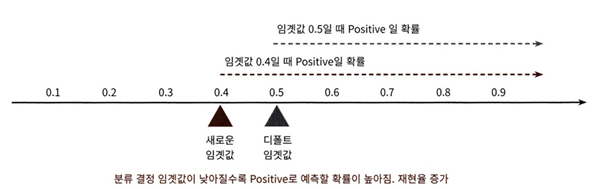

Positive 예측값이 많이지면 상대적으로 재현율 값이 높아진다. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문이다.

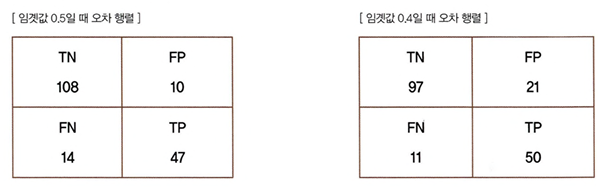

임곗값이 0.5에서 0.4로 낮아지면서 TP가 47에서 50으로 늘었고 FN이 14에서 11로 줄었다. 그에 따라 재현율이 0.770에서 0.820으로 좋아졌다. 하지만 FP는 10에서 21로 늘면서 정밀도가 0.825에서 0.704로 많이 나빠졌다. 그리고 정확도도 0.866에서 0.821로 나빠졌다.

이번에는 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사하겠다. 이를 위해 get_eval_by_threshold() 함수를 만들겠다.

In [18]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:',custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


수행 결과를 임곗값에 따른 평가 지표별로 정리했다. 임곗값이 0.45일 경우에 디폴트 0.5인 경우와 비교해서 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올랐다. 재현율을 향상시키면서 다른 수치를 어느 정도 감소하는 희생을 해야 한다면 임곗값 0.45가 가장 적당해 보인다.

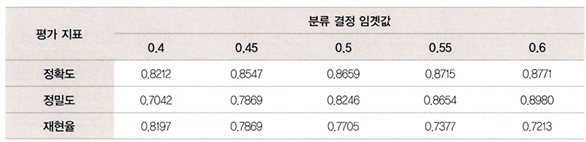

지금까지 임곗값 변화에 따른 평가 지표 값을 알아보는 코드를 작성했다. 사이킷런은 이와 유사한 precision_recall_curve() API의 입력 파라미터와 반환 값은 다음과 같다.

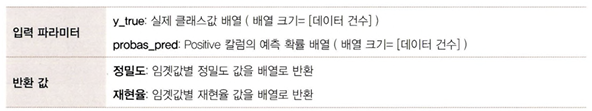

precision_recall_curve()를 이용해 타이타닉 예측 모델의 임곗값별 정밀도와 재현율을 구해보자. precision_recall_curve()의 인자로 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률 값을 입력한다. 레이블 값이 1일 때의 예측 확률 값은 predict_proba(X_test)[:,1]로 predict_proba()의 반환 ndarray의 두 번째 칼럼 값에 해당하는 데이터 세트이다. precision_recall_curve()는 일반적으로 0.11~0.95 정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarray를 반환한다.

반환되는 임곗값이 너무 작은 값 단위로 많이 구성되어 있다. 반환된 임곗값의 데이터가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 단계로 추출해 좀 더 큰 값의 임곗값과 그때의 정밀도와 재현율 값을 같이 살펴보자.



In [19]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있다. precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는 데 이용할 수 있다.

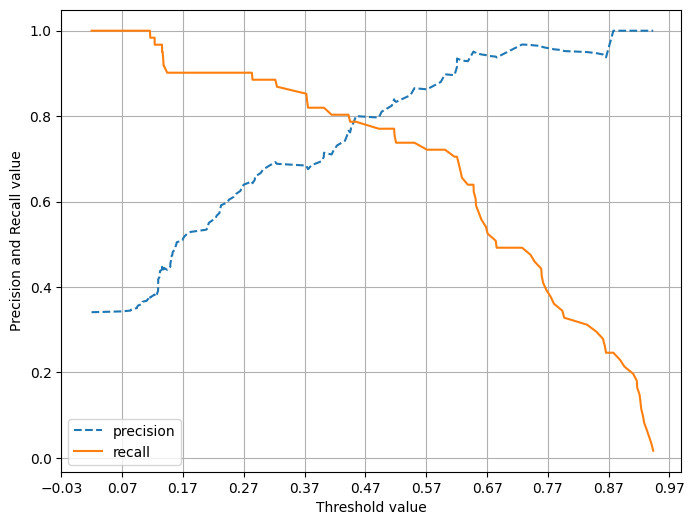

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

정밀도는 점선, 재현율은 실선으로 표현하였다. 임곗값에 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아지는 것을 확인할 수 있다. 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이된다. 해당 모델의 경우 임계값이 약 0.45 지점에서 재현율과 정밀도가 비슷해지는 모습을 볼 수 있다.

# 정밀도와 재현율의 맹점
Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 임곗값의 변경은 두 개의 수치를 상호 보완할 수준에서 적용되어야 한다. 그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안된다. 다음은 정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법이지만 숫자 놀음에 불과한 방법이다.

## 정밀도가 100%가 되는 방법
확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다. 예를 들어 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건 Positive, 다른 경우는 Negative로 예측하는 것이다.

정밀도 = TP / (TP + FP)이다. 전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 된다.

## 재현율이 100%가 되는 방법
모든 환자를 Positive로 예측하면 된다. 재현율 = TP / (TP +FN)이므로 전체 환자 1000명을 다 Positive로 예측하는 것이다. 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30+0)으로 100%가 된다.

이처럼 정밀도와 재현율 수치는 어느 한 쪽만 참조하면 극단적인 수치 조작이 가능하다. 따라서, 정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주할 수 있다. 따라서, 정밀도 또는 재현율 중 하나에 상대적인 중요도를 부여해 각 예측 상항에 맞는 분류 알고리즘을 튜닝할 수 있지만, 그렇다고 정밀도/재현율 중 하나만 강조하는 상황이 되어서는 안 된다.

정밀도와 재현율의 수치가 적절하게 조합되어 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요하다.

# 04 F1 스코어
F1 스코어(score)는 정밀도와 재현율을 결합한 지표이다. F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 갖는다. F1 스코어의 공식은 다음과 같다.

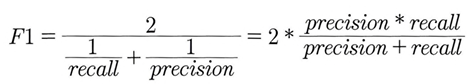

만일 A 예측 모델의 경우 정밀도가 0.9, 재현율이 0.1로 극단적인 차이가 나고, B 예측 모델은 정밀도가 0.5, 재현율이 0.5로 정밀도와 재현율이 큰 차이가 없다면 A 예측 모델의 F1 스코어는 0.18이고, B 예측 모델의 F1 스코어는 0.5로 B 모델이 A 모델에 비해 매우 우수한 F1 스코어를 가지게 된다.

사이킷런은 F1 스코어를 구하기 위해 f1_score()라는 API를 제공한다. 이를 이용해 정밀도와 재현율 절의 예제에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어를 구해 보겠다. 앞 절에서 사용한 주피터 노트북에 계속 이어서 코드를 작성하겠다.

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


이번에는 타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표를 구해 보겠다. 이를 위해 앞에서 작성한 get_clf_eval() 함수에 F1 스코어를 구하는 로직을 추가하겠다. 그리고 앞에서 작성한 get_eval_by_threshold() 함수를 이용해 임곗값 0.4~0.6별로 정확도, 정밀도, 재현율, F1 스코어를 알아보겠다.

In [22]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  # F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy,precision,recall,f1))

thresholds = [0.40,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000


위 예제의 출력 결과를 표로 정리하면 아래와 같다. F1 스코어는 임곗값이 0.6일 때 가장 좋은 값을 보여준다. 하지만 임곗값이 0.6인 경우에는 재현율이 크게 감소하고 있으니 주의하자.

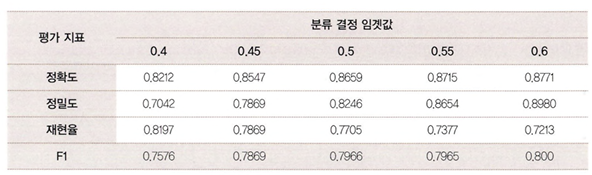

# ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC 곡선(Receiver Operation Characteristic Curve)은 수신자 판단 곡선으로 불리며, 머신러닝의 이진 분류 모델의 예측 성능을 평가하는 중요한 평가 지표이다. ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다. FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.

TPR은 재현율을 나타내며, TP/(FN+TP)로 구한다. TPR은 민감도라고도 불리는데 민감도에 대응하는 지표로는 TNR이라고 불리는 특이성(Specificity)가 있다.

* 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측되어야 하는 수준을 나타낸다. (질병이 있는 사람은 질병이 있는 것으로 양성 판정)
* 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측되어야 하는 수준을 나타낸다. (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

TNR인 특이성은 다음과 같이 구할 수 있다. TNR = TN/(FP+TN)

그리고 ROC 곡선의 X축 기준인 FPR(False Positive Rate)은 FP/(FP+TN) 이므로 1-TNR 또는 1-특이성 으로 표현된다.

**FPR = FP / (FP+TN) = 1 - TNR = 1 - 특이성**

ROC 곡선은 가운데 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 뛰어나다.

ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구한다. 따라서, 분류 결정 임곗값을 변경하는 것이다. 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이기 때문에 FPR을 0으로 만드려면 임곗값을 1로 지정하면 된다. 임곗값을 1로 지정하면 Positive 예측 기준이 매우 높아 Classifier가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문이다. 즉, 아예 Positive로 예측하지 않기 때문에 FP 값은 0이 되므로 FPR은 0이 된다.

FPR을 1로 만들기 위해서는 TN을 0으로 만들면 되고, 이를 위해서는 분류 결정 임곘값을 0으로 지정하면 된다. 그럼 Classifier의 Positive 확률 기준이 너무 낮아 모두 Positive로 예측한다. 그럼 아예 Negative 예측이 없기에 TN은 0이 되고 FPR은 1이 된다.

이처럼 임곗값을 1부터 0까지 변화시키며 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선이다.

사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다. 사용법은 precision_recall_curve()와 유사하다. 단지 반환값이 FPR, TPR, 임곗값으로 구성되어 있다.

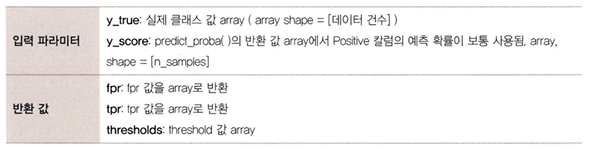

roc_curve() API를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값을 구해보자.



In [23]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
preb_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값 별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값 별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값 별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값 별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


roc_curve( )의 결과를 살펴보면 임곗값이 1에 가까운 점에서 점점 작아지면서 FPR이 점점 커진다. 그리고 FPR이 조금씩 커지면 TPR은 가파르게 커진다.

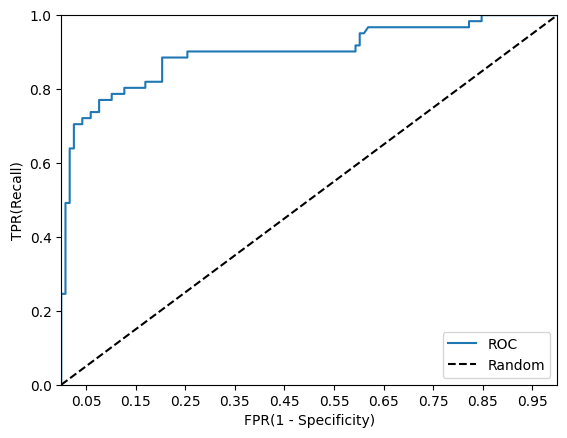

In [24]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0,1], [0,1], 'k--', label='Random')

  # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1 - Specificity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

일반적으로 ROC 곡선 자체는 FPR, TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다. AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울 수록 좋은 수치이다. AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다. 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 된다. 가운데 대각선 직선은 랜덤 수준의(동전 던지기 수준) 이진 분류 AUC 값으로 0.5이다. 따라서 보통의 분류는 0.5 이상의 AUC 값을 가진다.

In [25]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값은 약 0.8987로 측정된다. 마지막으로 get_clf_eval() 함수에 roc_auc_score()를 이용해 ROC AUC 값을 측정하는 로직을 추가하는데 ROC AUC는 예측 확률값을 기반으로 계산되므로 get_clf_eval() 함수의 인자로 받을 수 있도록 get_clf_eval(y_test, pred=None, pred_proba=None)로 함수형을 변경한다.



In [27]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  f1 = f1_score(y_test,pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1： {3:.4f}, AUC：{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 06 피마 인디언 당뇨병 예측

피마 인디언 당뇨병(Pima Indian Diabetes) 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고 평가 지표를 적용해보자. 피마 인디언 당뇨병 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터이다. 보통 당뇨 원인으로 식습관과 유전을 꼽는데 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속되어 왔지만, 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자가 발생했다. 고립된 유전적 특성 때문에 당뇨 학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구를 했다.

피마 인디언 당뇨병 데이터 세트는 다음 피처로 구성되어 있다.

* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량 지수
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


전체 768개의 데이터 중에서 Negative 값 0이 500개, Positive 값 1이 268개로 Negative가 상대적으로 많다. feature의 타입과 Null 개수를 살펴보자.

In [30]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값은 없으며 피처의 타입은 모두 숫자형이다. 임신 횟수, 나이와 같은 숫자형 피처와 당뇨 검사 수치 피처로 구성된 특징으로 볼 때 별도의 피처 인코딩은 필요하지 않아 보인다.

이제 로지스틱 회귀를 이용해 예측 모델을 생성해 보겠다. 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 나누고 학습 데이터 세트와 테스트 데이터 세트로 분리하겠다. 로지스틱 회귀를 이용해 예측을 수행하고 앞 예제에서 사용한 유틸리티 함수인 get_clf_eval(), get_eval_by_threshold(), precision_recall_curve_plot()을 이용해 성능 평가 지표를 출력하고 재현율 곡선을 시각화해 보겠다.

In [32]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1： 0.6465, AUC：0.8083


예측 정확도가 77.27%, 재현율은 59.26%로 측정되었다. 전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 조금 더 초점을 맞추어 정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인해보자.

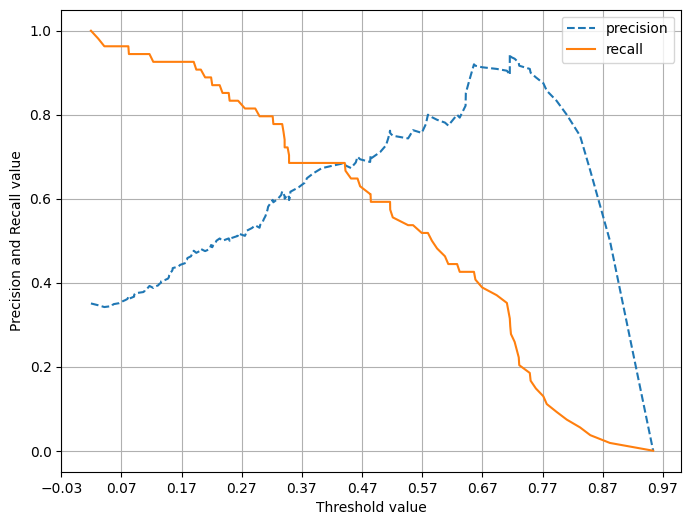

In [33]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞추게 된다. 하지만, 두 개의 지표 모두 0.7이 안 되는 수치로 지표의 값이 낮다. 임곗값을 인위로 조작하기 전에 describe() 메서드를 호출해 피처 값의 분포도를 살펴보자.

In [34]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


데이터 값을 보면 min( ) 값이 0으로 되어 있는 피처가 많다.

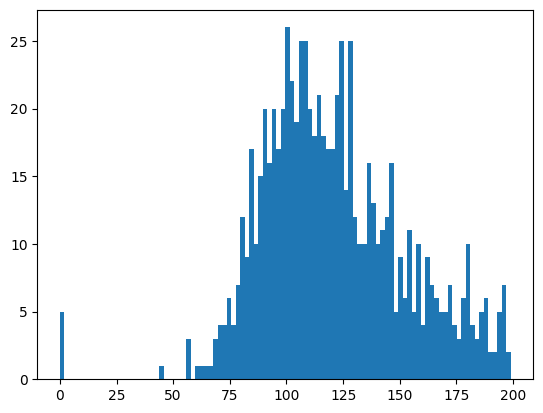

In [35]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

예를 들어, Glucose 피처는 포도당 수치로 0이 될 수 없는데 히스토그램 상에 0 값이 일정 수준 존재하는 것을 알 수 있다.

min() 값이 0으로 되어있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트 비율로 존재하는지 확인해보자.

In [36]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
  print('{0}0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,
                                             100*zero_count/total_count))

Glucose0 건수는 5, 퍼센트는 0.65%
BloodPressure0 건수는 35, 퍼센트는 4.56%
SkinThickness0 건수는 227, 퍼센트는 29.56%
Insulin0 건수는 374, 퍼센트는 48.70%
BMI0 건수는 11, 퍼센트는 1.43%


SkinThickness와 Insulin의 0값은 각각 전체의 29.56%, 48.7%로 매우 많다. 전체 데이터 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우 학습을 효과적으로 수행하기 어렵기에 피처의 0값을 평균값으로 대체한다.

In [38]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환하자. 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋다.

In [39]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1： 0.6804, AUC：0.8433


데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선되었다. 하지만 여전히 재현율 수치는 개선이 필요하다. 분류 결정 임곗값을 변화시키며 재현율 값의 성능 수치가 어느 정도 개선되는지 확인해보자.임곘값에 따른 평가 수치 출력은 앞서 사용한 get_eval_by_threshold( ) 함수를 이용한다.



In [40]:
# ipython-input-18-aa1c5058187a
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로하여 predict_proba_c1에 담긴 예측 확률을 0 or 1로 변환.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_predict)
        # get_clf_eval() 함수에 pred_proba_c1 추가 전달
        get_clf_eval(y_test, custom_predict, pred_proba_c1) # pred_proba_c1 추가

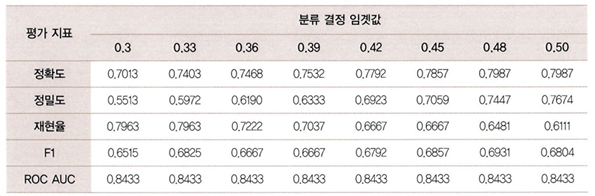

위를 근거로 정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임곗값은 0.33으로, 재현율 값이 0.7963이다. 하지만, 정밀도가 0.5927로 매우 저조해졌으므로 적절하지 않다. 임곗값 0.48일 경우 정확도는 0.7987, 정밀도는 0.7447, 재현율은 0.6481, F1 스코어는 0.6931, ROC AUC는 0.8433이 되어 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값으로 보인다.

로지스틱 회귀 모델을 이용해 임곗값을 0.48로 낮춘 상태에서 다시 예측을 수행해보자.

In [42]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼 값을 Binarizer로 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed


# 07 정리

분류에 사용되는 정확도, 오차 행렬, 정밀도, 재현율, F1 스코어, ROC-AUC와 같은 성능 평가 지표를 살펴보았다. 특히 이진 분류의 레이블 값이 불균형하게 분포될 경우 정확도 만으로는 머신러닝 모델의 예측 성능을 평가할 수 없다.

오차행렬은 Negative와 Positive 값을 갖는 실제 클래스 값과 예측 클래스 값이 True와 False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가한다. 정확도, 정밀도, 재현율 수치는 해당 4개의 값을 다양하게 결합해 만들어지고 이를 통해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생했는지 알 수 있다.

정밀도(Precision)와 재현율(Recall)은 Positive 데이터 세트의 예측 성능에 조금 더 초점을 맞춘 평가 지표이다. 특히 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 분류의 결정 임곗값을 조정해 정밀도 또는 재현율의 수치를 높이는 방법에 대해 알 수 있었다.

F1 스코어는 정밀도와 재현율을 결합한 평가 지표로 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 높은 지표값을 갖게 된다. ROC-AUC는 일반적으로 이진 분류 성능 평가를 위해 가장 많이 사용되는 지표로 AUC 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치이다.